In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold, learning_curve

In [2]:
df = pd.read_csv("mental_health_workplace_survey.csv")
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [23]:
# Encoding and Scaling
categorical_columns = ['Department', 'Country', 'Gender', 'JobRole', 'RemoteWork', 'HasTherapyAccess', 'HasMentalHealthSupport', 'SalaryRange']
df_encoded = pd.get_dummies(df, columns=categorical_columns)  

numerical_cols = df_encoded.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [24]:
df_encoded

,EmployeeID,Age,YearsAtCompany,WorkHoursPerWeek,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,...,RemoteWork_Yes,HasTherapyAccess_No,HasTherapyAccess_Yes,HasMentalHealthSupport_No,HasMentalHealthSupport_Yes,SalaryRange_100K+,SalaryRange_40K-60K,SalaryRange_60K-80K,SalaryRange_80K-100K,SalaryRange_<40K
0,1001,50,14,47,-0.831171,-0.145528,1.519164,-0.521468,0.319776,1.003164,...,False,False,True,True,False,False,True,False,False,False
1,1002,36,1,59,0.730817,-1.325175,0.051725,-0.682562,0.458507,1.387705,...,False,False,True,False,True,False,False,False,True,False
2,1003,29,13,59,0.618137,0.667888,0.070933,1.258235,-0.928806,1.632414,...,False,True,False,True,False,False,False,False,True,False
3,1004,42,15,31,-0.516442,-0.646685,0.339835,-0.318183,1.498992,0.269039,...,True,False,True,False,True,False,False,True,False,False
4,1005,40,6,34,1.076631,-1.194103,-0.808762,-1.303924,-1.622463,-0.604919,...,True,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3996,28,18,46,-1.029333,-0.099268,-0.205653,-0.789958,-0.512612,1.247872,...,False,True,False,False,True,False,False,False,True,False
2996,3997,24,14,31,-1.196412,-0.677526,-0.785713,0.563997,-1.136903,-1.269127,...,False,False,True,False,True,False,False,True,False,False
2997,3998,22,0,38,0.528769,0.806670,-1.277421,-1.227213,0.735970,1.212914,...,False,True,False,True,False,False,True,False,False,False
2998,3999,57,2,41,-0.734032,1.454319,1.530688,0.594682,1.290895,-1.688627,...,False,True,False,True,False,True,False,False,False,False


In [25]:
X = df_encoded.drop('BurnoutRisk', axis=1)
y = df_encoded['BurnoutRisk']

In [26]:
model = RandomForestClassifier(random_state=42)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Apply cross-validation
scores = cross_val_score(model, X, y, cv=kfold)

print("Cross-validation scores:", scores)
print("Average accuracy:", np.mean(scores))

Cross-validation scores: [1.         1.         1.         0.99833333 1.        ]
Average accuracy: 0.9996666666666666


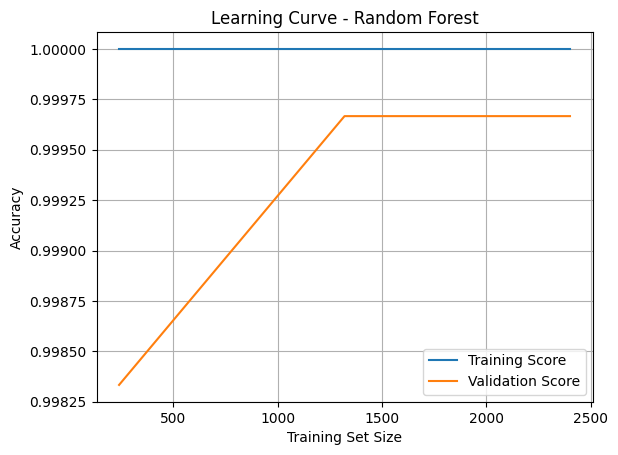

In [22]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=kfold, scoring='accuracy', n_jobs=-1
)

# Mean and Std of train/test scores
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Plot
plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.plot(train_sizes, test_scores_mean, label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Cross-Validation (CV) is a technique used to evaluate the performance of a machine learning model by splitting the dataset into multiple parts, and systematically training and testing the model on these parts.
# K-Fold is a specific type of cross-validation, where k defines the number of groups.
# Cross-Validation splits the data into k parts. In each iteration, one of the parts is used as the test set and the remaining parts as the training set. This process is repeated k times, so every part gets to be the test set once.

# Learn the balance between underfitting (high bias) and overfitting (high variance).
# Overfitting: Model performs well on training data but poorly on unseen (test) data. Happens when model learns noise.
# Underfitting: Model performs poorly on both training and test data. Happens when model is too simple.

# Learning Curves : Visualize how model performance evolves as the training size increases.

In [ ]:
# Those Cross-validation scores, indicates accuracy of each different group. Indicate low bias and low variance
# Training Accuracy is very high (almost 100%),This means the model fits the training data extremely well.
# Validation Accuracy, This indicates the model performs equally well on unseen data
# Since the validation accuracy remains high across all training sizes, the model learns the pattern well even with less data and keeps performing consistently as data grows.
# neither underfitting nor overfitting.